<a href="https://colab.research.google.com/github/LIvanoff/Big-Data-analysis-technologies-and-tools/blob/main/pr6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import seaborn as sns

## Задание 1

Найти данные для кластеризации. Данные в группе не должны
повторяться. Если признаки в данных имеют очень сильно разные
масштабы, то необходимо данные предварительно нормализовать.

In [ ]:
data = {'Ivanov':[1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
        'Kleyzer':[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1],
        'Aypova': [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        'Astanin': [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        'Karpov': [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        'Zaytsev': [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'Maslov': [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        'Sorokin': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        'Avalishvili': [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        'Boriskin': [1, 0, 0,	0,	0,	0,	0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        'Belyaev': [0,	0,	0, 0,	0,	0,	0,	1,	1,	0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        'Everstov': [1, 1,	0,	0,	0, 1,	0,	0,	1,	0,	0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1],
        'Mochalov': [1,	0,	0,	0,	0, 0,	1,	0,	0,	0,	0,	0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
        'Lekur': [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        'Kulikov': [0,	0,	1,	0,	1,	0,	1,	0,	0,	0,	1,	0,	1,	0, 1, 0, 0, 0, 0, 0, 0],
        'Garin': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
        'Petrosyan': [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1],
        'Gurov': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1],
        'Litwinov': [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
        'Novikova': [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
        'Korostylev': [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1]
        }

df = pd.DataFrame(data, index =['Ivanov', 'Kleyzer', 'Aypova', 'Astanin', 'Karpov', 'Zaytsev', 'Maslov', 'Sorokin',
                                'Avalishvili', 'Boriskin', 'Belyaev', 'Everstov', 'Mochalov', 'Lekur', 'Kulikov',
                                'Garin', 'Petrosyan', 'Gurov', 'Litwinov', 'Novikova', 'Korostylev'])

group_labels = [0,0,1,2,1,2,1,3,3,2,3,0,4,2,1,0,0,5,4,0,0]
group_labels = mark(group_labels)

In [ ]:
def mark(labels):
  group_labels = []
  for i in range(len(labels)):
    if labels[i] == 0:
      group_labels.append('ikbo-15')
    elif labels[i] == 1:
      group_labels.append('ikbo-04')
    elif labels[i] == 2:
      group_labels.append('ikbo-14')
    elif labels[i] == 3:
      group_labels.append('ikbo-22')
    elif labels[i] == 4:
      group_labels.append('ikbo-05')
    elif labels[i] == 5:
      group_labels.append('ikbo-24')
  return group_labels

In [ ]:
df

,Ivanov,Kleyzer,Aypova,Astanin,Karpov,Zaytsev,Maslov,Sorokin,Avalishvili,Boriskin,...,Everstov,Mochalov,Lekur,Kulikov,Garin,Petrosyan,Gurov,Litwinov,Novikova,Korostylev
Ivanov,1,1,0,0,0,0,1,0,1,1,...,1,1,0,0,1,1,1,1,1,1
Kleyzer,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,0,1,1
Aypova,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Astanin,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Karpov,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Задание 2

Провести кластеризацию данных с помощью алгоритма k-means.
Использовать «правило локтя» и коэффициент силуэта для поиска
оптимального количества кластеров.

In [ ]:
data = df.values

In [ ]:
cost = []
silhouet = []
for i in range(2, 20):
  model = cluster.KMeans(n_clusters=i, random_state=42).fit(data)
  cost.append(model.inertia_)
  silhouet.append(silhouette_score(data, model.labels_))

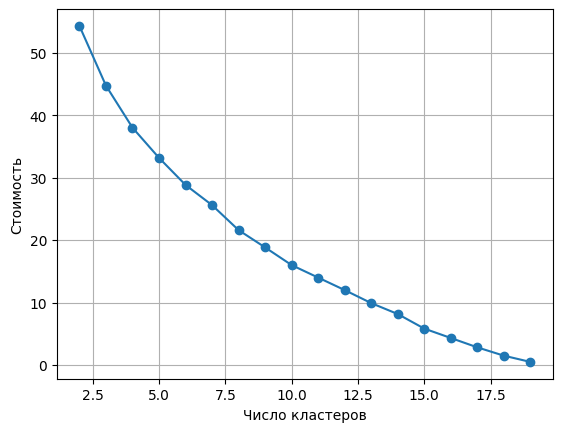

In [ ]:
plt.grid(0.5)
plt.plot(np.arange(2, 20), cost, marker='o')
plt.ylabel('Стоимость')
plt.xlabel('Число кластеров')
plt.show()

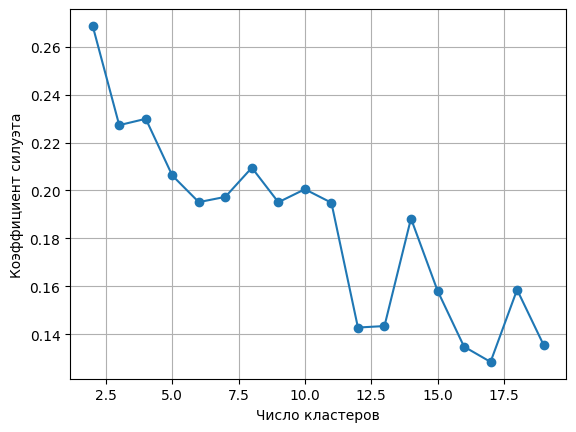

In [ ]:
plt.grid(0.5)
plt.plot(np.arange(2, 20), silhouet, marker='o')
plt.ylabel('Коэффициент силуэта')
plt.xlabel('Число кластеров')
plt.show()

In [ ]:
model = cluster.KMeans(n_clusters=6, random_state=42, n_init='auto').fit(data)
labels = model.labels_
labels

array([5, 5, 2, 3, 2, 2, 0, 3, 1, 1, 3, 1, 0, 3, 2, 4, 5, 1, 1, 4, 5],
      dtype=int32)

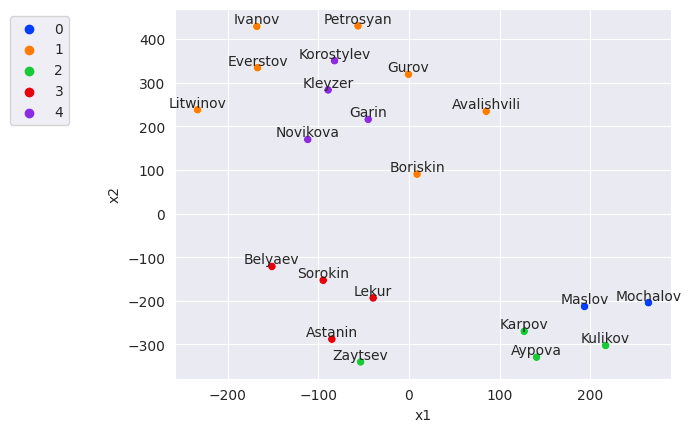

In [ ]:
tsne = TSNE(n_components=2, perplexity=6, random_state=42)
TSNE_features = tsne.fit_transform(df)

DATA = pd.DataFrame()
DATA['x1'] = TSNE_features[:,0]
DATA['x2'] = TSNE_features[:,1]

sns.set_style("darkgrid")
sns.scatterplot(x='x1', y='x2', hue=labels ,data=DATA, palette='bright')

for (xi, yi, zi) in zip(DATA['x1'], DATA['x2'], df.index):
    plt.text(xi, yi, zi, va='bottom', ha='center')

plt.legend(bbox_to_anchor=(-0.2, 1))
plt.show()

## Задание 3

Провести кластеризацию данных с помощью алгоритма иерархической
кластеризации.

In [ ]:
model = cluster.AgglomerativeClustering(5, compute_distances=True).fit(data)
labels = model.labels_

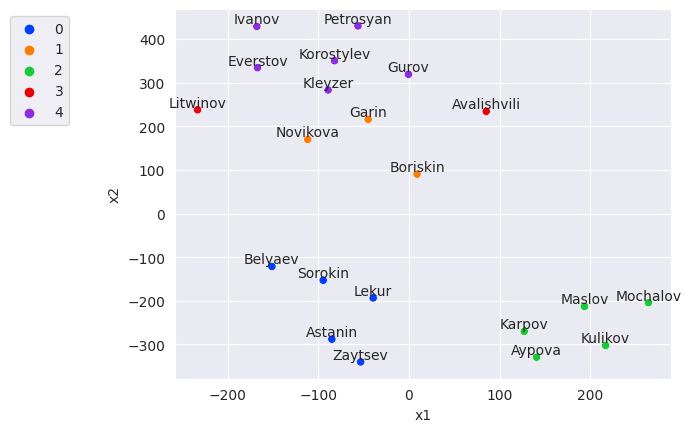

In [ ]:
sns.set_style("darkgrid")
sns.scatterplot(x='x1', y='x2', hue=labels ,data=DATA, palette='bright')

for (xi, yi, zi) in zip(DATA['x1'], DATA['x2'], df.index):
    plt.text(xi, yi, zi, va='bottom', ha='center')

plt.legend(bbox_to_anchor=(-0.2, 1))
plt.show()

## Задание 4

Провести кластеризацию данных с помощью алгоритма DBSCAN.

In [ ]:
model = cluster.DBSCAN(eps=2, min_samples=2).fit(data)
labels = model.labels_

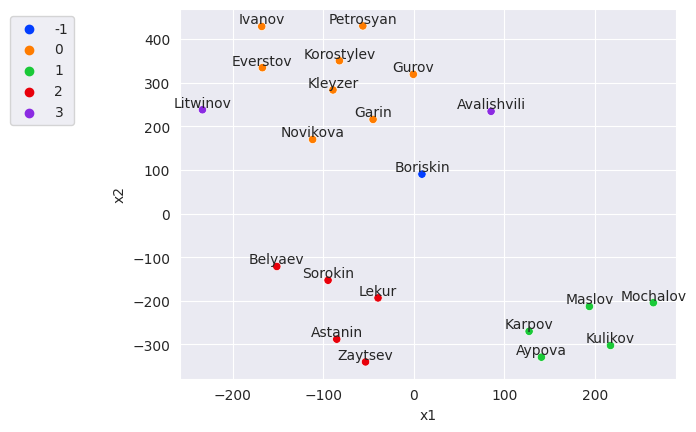

In [ ]:
sns.set_style("darkgrid")
sns.scatterplot(x='x1', y='x2', hue=labels ,data=DATA, palette='bright')

for (xi, yi, zi) in zip(DATA['x1'], DATA['x2'], df.index):
    plt.text(xi, yi, zi, va='bottom', ha='center')

plt.legend(bbox_to_anchor=(-0.2, 1))
plt.show()